In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as po

df = pd.read_csv('parts_sellers.csv')
df = df[df.year_sales > 0]
labels = ['bing', 'direct','email', 'google_text_ad', 'organic']
df = df[df.source_em.isin(labels)]

In [2]:
print(df.columns)

Index(['seller_id', 'profit_estimate', 'value_em', 'user_created',
       'booth_created', 'first_sale', 'days_to_sale', 'country', 'state',
       'city', 'committed', 'year_sales', 'year_amount', 'year_fvf',
       'items_for_sale', 'sales', 'source_em', 'entry_source_em',
       'inventory_source_em', 'entry_url', 'entry_query'],
      dtype='object')


In [3]:
whale = df[df.value_em == 'whale']
minnow = df[df.value_em == 'minnow']
sea_bass = df[df.value_em == 'sea_bass']
dolphin = df[df.value_em == 'dolphin']
value_em = [whale, dolphin, sea_bass, minnow]
names = ['Whale', 'Dolphin', 'Sea_bass', 'Minnow']

In [7]:
for name, value in zip(names, value_em):
    mean = value.items_for_sale.round(0).mean()
    median = value.items_for_sale.apply(np.round).median()
    std = value.items_for_sale.round(0).std()
    print(str(name) + ": Mean = " + str(mean) + ", Median = " + str(median) + ", STD = " + str(std))

Whale: Mean = 12962.117647058823, Median = 4190.0, STD = 20477.25730428473
Dolphin: Mean = 2920.4797297297296, Median = 964.0, STD = 5615.913416621347
Sea_bass: Mean = 1952.0882352941176, Median = 209.0, STD = 5684.336716017931
Minnow: Mean = 961.7510729613734, Median = 69.0, STD = 5510.639699224118


In [119]:
size = 1000
for value in value_em:
    if len(value) < size:
        size = len(value)

sample_whale = whale.sample(size)
sample_dolphin = dolphin.sample(size)
sample_sea_bass = sea_bass.sample(size)
sample_minnow = minnow.sample(size)


In [3]:
whale = whale.groupby(['source_em']).count().sort_index()
dolphin = dolphin.groupby(['source_em']).count() #.append([0]).rename(index={0:'bing'}).sort_index()
sea_bass = sea_bass.groupby(['source_em']).count().sort_index()
minnow = minnow.groupby(['source_em']).count().sort_index()


print(whale.seller_id)
print(dolphin.seller_id)
print(sea_bass.seller_id)
print(minnow.seller_id)

source_em
bing               2
direct            19
email              6
google_text_ad     4
organic           20
Name: seller_id, dtype: int64
source_em
bing               2
direct            69
email             17
google_text_ad    15
organic           45
Name: seller_id, dtype: int64
source_em
bing               2
direct            15
email              5
google_text_ad     4
organic            8
Name: seller_id, dtype: int64
source_em
bing               11
direct            102
email              21
google_text_ad     19
organic            80
Name: seller_id, dtype: int64


In [49]:
labels = ['bing', 'direct','email', 'google_text_ad', 'organic']
values = [minnow.seller_id, sea_bass.seller_id, dolphin.seller_id, whale.seller_id]
colors = ['#19005c', '#810060','#c80050','#f35a33','#ffa600']
x_values = [[0, .48], [.52, 1], [0, .48], [.52, 1]]
y_values = [[0, .49], [0, .49], [.51, 1], [.51, 1]]
names = ['minnow', 'sea_bass', 'dolphin', 'whale']

In [66]:
data = []

for value, label, x, y , name in zip(values, labels, x_values, y_values, names):
        data.append({'labels':labels,
            'values': value,
            'domain' : {'x': x,
                       'y': y},
            'type': 'pie',
            'marker': {'colors': colors},
            "hoverinfo":"label+percent+value",
            "title": name,
            'titlefont' : dict(size=24),
            'textfont': dict(color='#FFFFFF'),
                
 
            },)
            

In [67]:
layout = {
    'title':'Value_em by Source',
    'titlefont' : dict(size=32),
    'legend' : dict(x=.45, y=.5, font = dict(size = 20)),
}

In [68]:
fig = { 'data': data, 'layout': layout }
po.plot(fig, filename='pie_chart.html')

'file:///Users/kevin/data_analysis/pie_chart.html'

In [24]:
print(minnow.seller_id)

source_em
affiliate          3
bing               1
direct            17
email              5
google_text_ad     5
organic           12
other              1
shopping           6
Name: seller_id, dtype: int64


In [25]:






trace1 = go.Pie(values=minnow.seller_id,labels=minnow.index)
trace2 = go.Pie(values=sea_bass.seller_id,labels=sea_bass.index)
trace3 = go.Pie(values=dolphin.seller_id,labels=dolphin.index)
trace4 = go.Pie(values=whale.seller_id,labels=whale.index)

In [26]:
from plotly import tools
names = ['minnow', 'sea_bass', 'dolphin', 'whale']
size = [minnow, sea_bass, dolphin, whale]



fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('Minnow', 'Sea Bass',
                                                          'Dolphin', 'Whale'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
po.plot(fig, filename='donut.html')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



ValueError: Invalid property specified for object of type plotly.graph_objs.Pie: 'xaxis'

    Valid properties:
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on plot.ly for  customdata .
        direction
            Specifies the direction at which succeeding sectors
            follow one another.
        dlabel
            Sets the label step. See `label0` for more info.
        domain
            plotly.graph_objs.pie.Domain instance or dict with
            compatible properties
        hole
            Sets the fraction of the radius to cut out of the pie.
            Use this to make a donut chart.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on plot.ly for  hoverinfo .
        hoverlabel
            plotly.graph_objs.pie.Hoverlabel instance or dict with
            compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". See https://github.com/d3/d3-format
            /blob/master/README.md#locale_format for details on the
            formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plot.ly/javascript/plotlyjs-events/#event-data.
            Additionally, every attributes that can be specified
            per-point (the ones that are `arrayOk: true`) are
            available. variables `label`, `color`, `value`,
            `percent` and `text`. Anything contained in tag
            `<extra>` is displayed in the secondary box, for
            example "<extra>{fullData.name}</extra>".
        hovertemplatesrc
            Sets the source reference on plot.ly for  hovertemplate
            .
        hovertext
            Sets hover text elements associated with each sector.
            If a single string, the same string appears for all
            data points. If an array of string, the items are
            mapped in order of this trace's sectors. To be seen,
            trace `hoverinfo` must contain a "text" flag.
        hovertextsrc
            Sets the source reference on plot.ly for  hovertext .
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on plot.ly for  ids .
        insidetextfont
            Sets the font used for `textinfo` lying inside the pie.
        label0
            Alternate to `labels`. Builds a numeric set of labels.
            Use with `dlabel` where `label0` is the starting label
            and `dlabel` the step.
        labels
            Sets the sector labels. If `labels` entries are
            duplicated, we sum associated `values` or simply count
            occurrences if `values` is not provided. For other
            array attributes (including color) we use the first
            non-empty entry among all occurrences of the label.
        labelssrc
            Sets the source reference on plot.ly for  labels .
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        marker
            plotly.graph_objs.pie.Marker instance or dict with
            compatible properties
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        opacity
            Sets the opacity of the trace.
        outsidetextfont
            Sets the font used for `textinfo` lying outside the
            pie.
        pull
            Sets the fraction of larger radius to pull the sectors
            out from the center. This can be a constant to pull all
            slices apart from each other equally or an array to
            highlight one or more slices.
        pullsrc
            Sets the source reference on plot.ly for  pull .
        rotation
            Instead of the first slice starting at 12 o'clock,
            rotate to some other angle.
        scalegroup
            If there are multiple pies that should be sized
            according to their totals, link them by providing a
            non-empty group id here shared by every trace in the
            same group.
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        sort
            Determines whether or not the sectors are reordered
            from largest to smallest.
        stream
            plotly.graph_objs.pie.Stream instance or dict with
            compatible properties
        text
            Sets text elements associated with each sector. If
            trace `textinfo` contains a "text" flag, these elements
            will be seen on the chart. If trace `hoverinfo`
            contains a "text" flag and "hovertext" is not set,
            these elements will be seen in the hover labels.
        textfont
            Sets the font used for `textinfo`.
        textinfo
            Determines which trace information appear on the graph.
        textposition
            Specifies the location of the `textinfo`.
        textpositionsrc
            Sets the source reference on plot.ly for  textposition
            .
        textsrc
            Sets the source reference on plot.ly for  text .
        title
            plotly.graph_objs.pie.Title instance or dict with
            compatible properties
        titlefont
            Deprecated: Please use pie.title.font instead. Sets the
            font used for `title`. Note that the title's font used
            to be set by the now deprecated `titlefont` attribute.
        titleposition
            Deprecated: Please use pie.title.position instead.
            Specifies the location of the `title`. Note that the
            title's position used to be set by the now deprecated
            `titleposition` attribute.
        uid

        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        values
            Sets the values of the sectors of this pie chart. If
            omitted, we count occurrences of each label.
        valuessrc
            Sets the source reference on plot.ly for  values .
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        

In [47]:
df.profit_estimate = pd.to_numeric(df.profit_estimate, errors='coerce')
df.year_fvf = pd.to_numeric(df.year_fvf, errors='coerce')

In [48]:
active = df.groupby('committed').count()
print(active.seller_id)

committed
False    116
True     605
Name: seller_id, dtype: int64


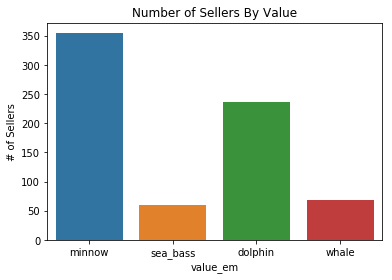

In [49]:
value_order = ['minnow', 'sea_bass', 'dolphin', 'whale']
value_em = df.groupby('value_em').count()
ax = plt.subplot()
fig = sns.barplot(x=value_em.index, y=value_em.seller_id, order=value_order)
ax.set_title("Number of Sellers By Value")
ax.set_ylabel("# of Sellers")

fig_1 = fig.get_figure()
fig_1.savefig('parts_sellers_by_value.png')




/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



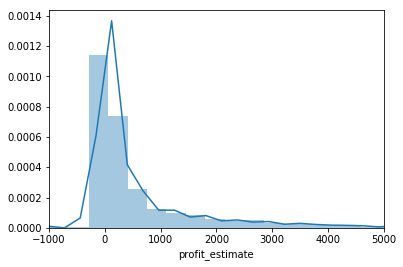

In [50]:
with_sales = df[df.sales > 0]
without_sales = df[df.sales < 1]

sns.distplot(with_sales.profit_estimate, bins=100)
plt.xlim(-1000, 5000)
plt.show()

In [51]:
top_sellers_fvf = df.sort_values('year_fvf', ascending=False)[:10]


In [52]:
state_df_sum = df.groupby('state').sum()
state_df_count = df.groupby('state').count()

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

#state_df['text'] = (state_df_sum.profit_estimate + '<br>' + state_df_count.seller_id)
 #   'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
  #  'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
   # 'Wheat '+df['wheat']+' Corn '+df['corn']



In [53]:
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = state_df_sum.index,
        z = state_df_sum.profit_estimate.astype(float),
        locationmode = 'USA-states',
        text = state_df_count.seller_id,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Profit Estimate")
        ) ]

layout = dict(
        title = 'Profit Estimate Per State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
po.plot( fig, filename='d3-cloropleth-map.html' )

'file:///Users/kevin/data_analysis/d3-cloropleth-map.html'

(0, 1500)

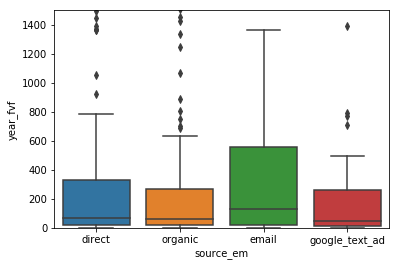

In [55]:
top_sources = ['direct', 'organic', 'google_text_ad', 'email']

source_em = df[df.source_em.isin(top_sources)]
    
sns.boxplot(x=source_em.source_em, y=source_em.year_fvf)
plt.ylim(0,1500)



In [64]:
year = df.groupby(df.booth_created.year).sum()
print(year)

AttributeError: 'Series' object has no attribute 'year'